In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Ch.1 第一種兌換方式
### modelA 

In [96]:
path_s = dict()
path_s['main'] = 'D:\\Onedrive\\Documents\\GAMSStudio'
path_s['1.5a'] = '\\or_report_1.5_model_A_multinode_trivial'
path_s['1.5b'] = '\\or_report_1.5_model_B_multinode_trivial'
path_s['1.6a'] = '\\or_report_1.6_model_A_multinode'
path_s['1.6b'] = '\\or_report_1.6_model_A_multinode'
path_s['5e'] = '\\5nodes'
path_s['6f'] = '\\6nodes'
path_s['7g'] = '\\7nodes'
path_s['8h'] = '\\8nodes'
path_s['9i'] = '\\9nodes'

In [97]:
mA_5e_cost = pd.read_csv(
    path_s['main'] + path_s['1.5a'] + path_s['5e'] + '\\or_report.1.5_mA_5e_out_cost.csv')
mA_5e_isfeasible = pd.read_csv(
    path_s['main'] + path_s['1.5a'] + path_s['5e'] + '\\or_report.1.5_mA_5e_out_isfeasible.csv')
mA_5e_remain = pd.read_csv(
    path_s['main'] + path_s['1.5a'] + path_s['5e'] + '\\or_report.1.5_mA_5e_out_remain.csv')
mA_5e_remainrate = pd.read_csv(
    path_s['main'] + path_s['1.5a'] + path_s['5e'] + '\\or_report.1.5_mA_5e_out_remainrate.csv')


In [78]:
mA_5e_remain

,remain(iter)
1,0.95
2,1.90
3,2.85
4,3.80
5,4.75
...,...
996,-196.00
997,-197.00
998,-198.00
999,-199.00


In [79]:
mA_5e = pd.DataFrame()
mA_5e['cost'] = mA_5e_cost['cost(iter)']
mA_5e['remain'] = mA_5e_remain['remain(iter)']
mA_5e['remainrate'] = mA_5e_remainrate['remainrate(iter)']
mA_5e['isfeasible'] = mA_5e_isfeasible['isfeasible(iter)']

In [80]:
mA_5e.loc[800, :]

cost          800.0
remain          NaN
remainrate      NaN
isfeasible      4.0
Name: 800, dtype: float64

In [81]:
mA_5e.loc[800, ('remain')] = 0
mA_5e.loc[800, ('remainrate')] = 0 #instead of mA_5e['remainrate'][800]
#this row should be 0, but gams doesn't do this instead of giving Nan
mA_5e.loc[800]

cost          800.0
remain          0.0
remainrate      0.0
isfeasible      4.0
Name: 800, dtype: float64

Text(0.5, 0, 'remainrate')

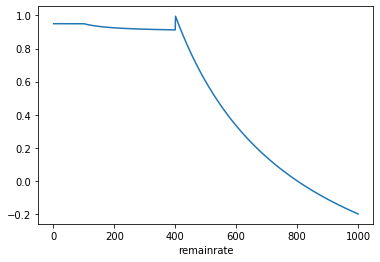

In [82]:
plt.plot(mA_5e['remainrate'])
plt.xlabel("remainrate")

In [83]:
mA_5e['cost_fail'] = mA_5e['cost']
mA_5e['remain_fail'] = mA_5e['remain']
mA_5e['remainrate_fail'] = mA_5e['remainrate']
endpoint = 0

for i in list(mA_5e.index):
    isfeasible = mA_5e.loc[i, ('isfeasible')]
    if mA_5e.loc[i, ('isfeasible')] == 1:
        mA_5e.loc[i, ('cost_fail')] = None
        mA_5e.loc[i, ('remain_fail')] = None 
        mA_5e.loc[i, ('remainrate_fail')] = None
    else :
        mA_5e.loc[i, ('cost')] = None
        mA_5e.loc[i, ('remain')] = None 
        mA_5e.loc[i, ('remainrate')] = None

In [84]:
for i in list(mA_5e.index):
    if mA_5e.loc[i, ('isfeasible')] == 4:
        endpoint = i - 1
        break
print(endpoint)

400


In [85]:
mA_5e

,cost,remain,remainrate,isfeasible,cost_fail,remain_fail,remainrate_fail
1,0.05,0.95,0.95,1,NaN,NaN,NaN
2,0.10,1.90,0.95,1,NaN,NaN,NaN
3,0.15,2.85,0.95,1,NaN,NaN,NaN
4,0.20,3.80,0.95,1,NaN,NaN,NaN
5,0.25,4.75,0.95,1,NaN,NaN,NaN
...,...,...,...,...,...,...,...
996,NaN,NaN,NaN,4,1192.0,-196.0,-0.196787
997,NaN,NaN,NaN,4,1194.0,-197.0,-0.197593
998,NaN,NaN,NaN,4,1196.0,-198.0,-0.198397
999,NaN,NaN,NaN,4,1198.0,-199.0,-0.199199


Text(0.5, 1.0, 'model in 5 nodes')

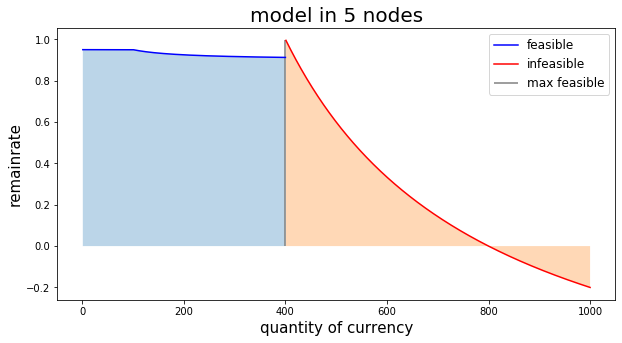

In [90]:
plt.figure(figsize = (10, 5))
plt.plot(mA_5e['remainrate'], color = 'b')
plt.plot(mA_5e['remainrate_fail'], color = 'r')
plt.vlines(endpoint, ymin = 0, ymax = mA_5e.loc[endpoint+1, ('remainrate_fail')], color = 'gray')
plt.xlabel('quantity of currency', fontdict = {'fontsize':15})
plt.ylabel('remainrate', fontdict = {'fontsize': 15})
plt.fill_between(list(mA_5e.index), mA_5e['remainrate'], 0, alpha = 0.3)
plt.fill_between(list(mA_5e.index), mA_5e['remainrate_fail'], 0, alpha = 0.3)
plt.legend(('feasible', 'infeasible', 'max feasible',), fontsize = 12)
plt.title('model in 5 nodes', fontdict = {'fontsize': 20})

Text(0.5, 1.0, 'model in 5 nodes')

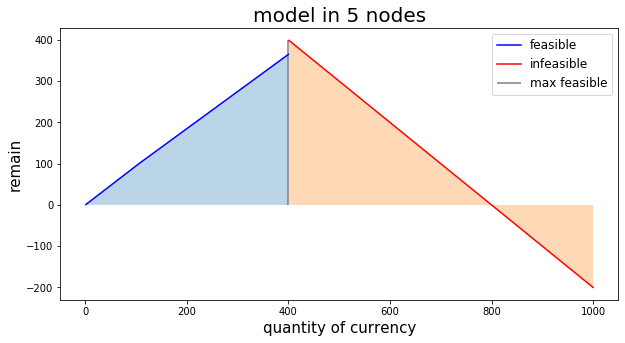

In [87]:
plt.figure(figsize = (10, 5))
plt.plot(mA_5e['remain'], color = 'b')
plt.plot(mA_5e['remain_fail'], color = 'r')
plt.vlines(endpoint, ymin = 0, ymax = mA_5e.loc[endpoint+1, ('remain_fail')], color = 'gray')
plt.xlabel('quantity of currency', fontdict = {'fontsize':15})
plt.ylabel('remain', fontdict = {'fontsize': 15})
plt.fill_between(list(mA_5e.index), mA_5e['remain'], 0, alpha = 0.3)
plt.fill_between(list(mA_5e.index), mA_5e['remain_fail'], 0, alpha = 0.3)
plt.legend(('feasible', 'infeasible', 'max feasible',), fontsize = 12)
plt.title('model in 5 nodes', fontdict = {'fontsize': 20})


In [88]:
mA_5e.loc[endpoint, ('isfeasible')]

1

In [89]:
mA_5e.loc[endpoint+1]

cost                      NaN
remain                    NaN
remainrate                NaN
isfeasible           4.000000
cost_fail            2.000000
remain_fail        399.000000
remainrate_fail      0.995012
Name: 401, dtype: float64

In [109]:
def bbb():
    bb = plt.figure(figsize = (10, 5))
    plt.plot(mA_5e['remain'], color = 'b')
    plt.plot(mA_5e['remain_fail'], color = 'r')
    return bb

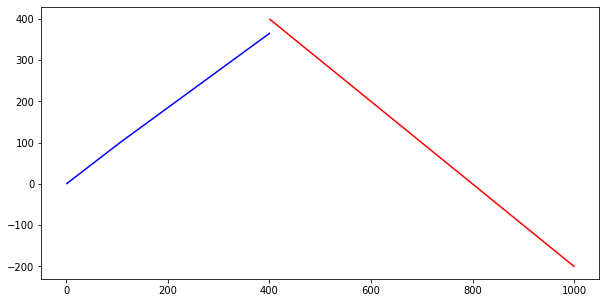

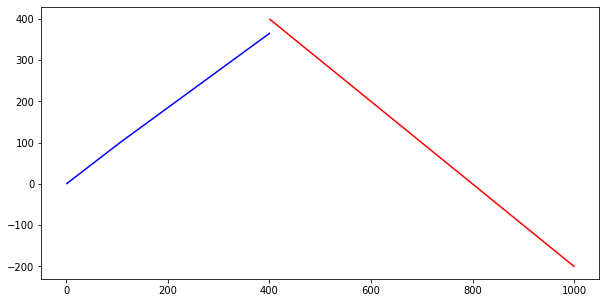

In [110]:
bbb()